:**Dataset**
labeled datasset collected from twitter (Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>

**Total Estimated Time = 90-120 Mins**

**Evaluation metric**
macro f1 score

### Import used libraries

In [1]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

### Load Dataset

###### Note: search how to load the data from tsv file

In [ ]:
df = pd.read_csv("Lab 1 - Hate Speech.tsv", sep= "\t")
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [ ]:
df.shape

(31535, 3)

### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

X = df['tweet']  # Features
y = df['label']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### EDA on training data

- check NaNs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31535 entries, 0 to 31534
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31535 non-null  int64 
 1   label   31535 non-null  int64 
 2   tweet   31535 non-null  object
dtypes: int64(2), object(1)
memory usage: 739.2+ KB


- check duplicates

In [ ]:
df.duplicated().sum()

0

- show a representative sample of data texts to find out required preprocessing steps

In [ ]:
# # Display a representative sample of text data (10%)
# sample_texts = df['tweet'].sample(frac=0.1, random_state=7)
# for text in sample_texts:
#     print(text)
#     print('-' * 50)

In [ ]:
tweta=df['tweet'][1000]
tweta

'just booked our trip to europeð\x9f\x91\x8fð\x9f\x8f»â\x9c\x88ï¸\x8f @user @user   #travelwise #europe2016 #london #paris'

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    '''
    The `clean_text` function preprocesses a given text string by performing several cleaning steps to prepare it for natural language processing (NLP) tasks. The function follows these steps:

    1. Convert to lowercase: Transforms all characters in the text to lowercase to ensure uniformity.
    2. Remove URLs: Eliminates any URLs present in the text using a regular expression.
    3. Remove mentions and hashtags: Removes Twitter-like mentions (e.g., @user) and hashtags, retaining only the text content.
    4. Remove special characters: Strips out all characters that are not letters or spaces, including emojis and punctuation.
    5. Tokenization: Splits the text into individual words (tokens).
    6. Remove stopwords: Filters out common English stopwords that do not contribute significant meaning.
    7. Lemmatization: Converts words to their base or dictionary form.
    8. Join tokens: Combines the cleaned tokens back into a single string.

    Parameters:
    text (str): The input text string to be cleaned.

    Returns:
    cleaned_text (str): The processed and cleaned text string.
    '''
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)

    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Example
tweet = "just booked our trip to europeð\x9f\x91\x8fð\x9f\x8f»â\x9c\x88ï¸\x8f @user @user #travelwise #europe2016 #london #paris"
cleaned_tweet = clean_text(tweet)
print(cleaned_tweet)


booked trip europe travelwise europe london paris


In [ ]:
df['tweet'].apply(clean_text)

0                                               father dysfunctional selfish drag kid dysfunction run
1              thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked
2                                                                                      bihday majesty
3                                                                         model love u take u time ur
4                                                                       factsguide society motivation
                                                     ...                                             
31530                                                                                   ate isz youuu
31531    see nina turner airwave trying wrap mantle genuine hero like shirley chisolm shame imwithher
31532                                                  listening sad song monday morning otw work sad
31533                                                 sikh temple vandalised calga

- check dataset balancing

In [ ]:
class_counts = df['label'].value_counts()
print(class_counts)

label
0    29322
1     2213
Name: count, dtype: int64


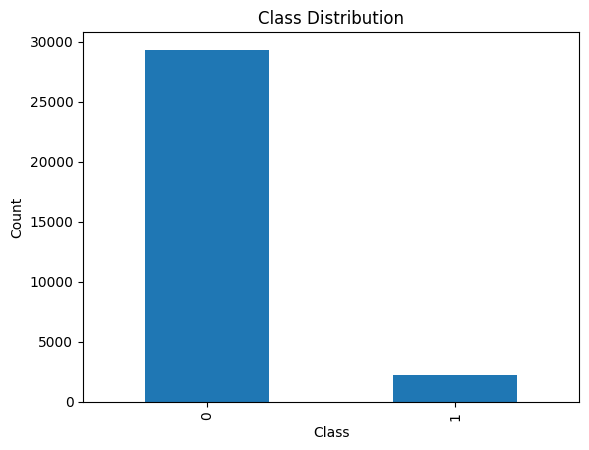

In [ ]:
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


### Cleaning and Preprocessing

#### Extra: use custom scikit-learn Transformers

Using custom transformers in scikit-learn provides flexibility, reusability, and control over the data transformation process, allowing you to seamlessly integrate with scikit-learn's pipelines, enabling you to combine multiple preprocessing steps and modeling into a single workflow. This makes your code more modular, readable, and easier to maintain.

##### link: https://www.andrewvillazon.com/custom-scikit-learn-transformers/

#### Example usage:

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator

In [ ]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # Add code for fitting the transformer here
        return self

    def transform(self, X):
        # Add code for transforming the data here
        transformed_X = X.copy()
        transformed_X = transformed_X.apply(self.clean_text)
        return transformed_X

    def clean_text(self,text):
        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove mentions and hashtags
        #text = re.sub(r'@[A-Za-z0-9_]+', '', text)
        #text = re.sub(r'#', '', text)

        # Remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenization
        tokens = word_tokenize(text)

        # Remove stopwords
        #stop_words = set(stopwords.words('english'))
        #tokens = [word for word in tokens if word not in stop_words]
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatization
        #lemmatizer = WordNetLemmatizer()
        #tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # Join tokens back into a string
        cleaned_text = ' '.join(tokens)

        return cleaned_text

    def fit_transform(self, X, y=None):
        # This function combines fit and transform
        self.fit(X, y)
        return self.transform(X)

**You  are doing Great so far!**

### Modelling

#### Extra: use scikit-learn pipline

##### link: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Using pipelines in scikit-learn promotes better code organization, reproducibility, and efficiency in machine learning workflows.

#### Example usage:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer(stop_words='english')
count_vectorizer = CountVectorizer(stop_words='english')


In [ ]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()


In [ ]:
custom_transformer=CustomTransformer()

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessing', custom_transformer),  # Preprocessing step
    ('vectorizing', count_vectorizer),             # Vectorization step
    ('model', model)                         # Model fitting and prediction step
])

# Now you can use the pipeline for training and prediction
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', CustomTransformer()),
                ('vectorizing', CountVectorizer(stop_words='english')),
                ('model', SGDClassifier())])

#### Evaluation

**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

In [ ]:
from sklearn.metrics import f1_score

# Assuming you have X_train, y_train for training and X_test, y_test for evaluation

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict with the pipeline
predictions = pipeline.predict(X_test)

# Evaluate the predictions using macro F1 score
macro_f1 = f1_score(y_test, predictions, average='macro')

print("Macro F1 Score:", macro_f1)


Macro F1 Score: 0.8419702016506969


### Enhancement

- Using different N-grams
- Using different text representation technique
- Hyperparameter tuning

In [ ]:
# pip install optuna

In [ ]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Train the final pipeline with the best hyperparameters on the full training data
best_params = study.best_params

# Configure the best vectorizer and model based on the best parameters found by Optuna
if best_params['vectorizer'] == 'count':
    best_vectorizer = CountVectorizer(ngram_range=best_params['ngram_range'])
else:
    best_vectorizer = TfidfVectorizer(ngram_range=best_params['ngram_range'])

if best_params['model'] == 'sgd':
    best_model = SGDClassifier(max_iter=best_params['max_iter'], alpha=best_params['alpha'],
                               loss=best_params['loss'], penalty=best_params['penalty'], random_state=42)
elif best_params['model'] == 'nb':
    best_model = MultinomialNB(alpha=best_params['nb_alpha'])

# Create the final pipeline with the best hyperparameters
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('vectorizing', best_vectorizer),
    ('model', best_model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = pipeline.predict(X_test)

# Calculate the F1 micro score
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print the F1 micro score
print(f"F1 micro score: {f1_micro}")


[I 2024-05-18 07:38:48,738] A new study created in memory with name: no-name-27150407-6166-45da-bda0-f83383bae2ca
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(message)
<ipython-input-43-a9e863e70c42>:17: FutureWarning: suggest_loguniform has been deprecated i

Best trial:
  Value: 0.9557237972432665
  Params: 
    vectorizer: count
    max_features: 4455
    ngram_range: (1, 1)
    model: sgd
    max_iter: 407
    alpha: 0.0003707384093093721
    loss: modified_huber
    penalty: elasticnet


Pipeline(steps=[('preprocessing', CustomTransformer()),
                ('vectorizing', CountVectorizer(max_features=4455)),
                ('model',
                 SGDClassifier(alpha=0.0003707384093093721,
                               loss='modified_huber', max_iter=407,
                               penalty='elasticnet', random_state=42))])

In [ ]:
# Print the best model
print("Best model:")
print(best_model)


Best model:
SGDClassifier(alpha=0.0003707384093093721, loss='modified_huber', max_iter=407,
              penalty='elasticnet', random_state=42)


Best trial:
  Value: 0.9557237972432665
  Params: 
    vectorizer: count
    max_features: 4455
    ngram_range: (1, 1)
    model: sgd
    max_iter: 407
    alpha: 0.0003707384093093721
    loss: modified_huber
    penalty: elasticnet


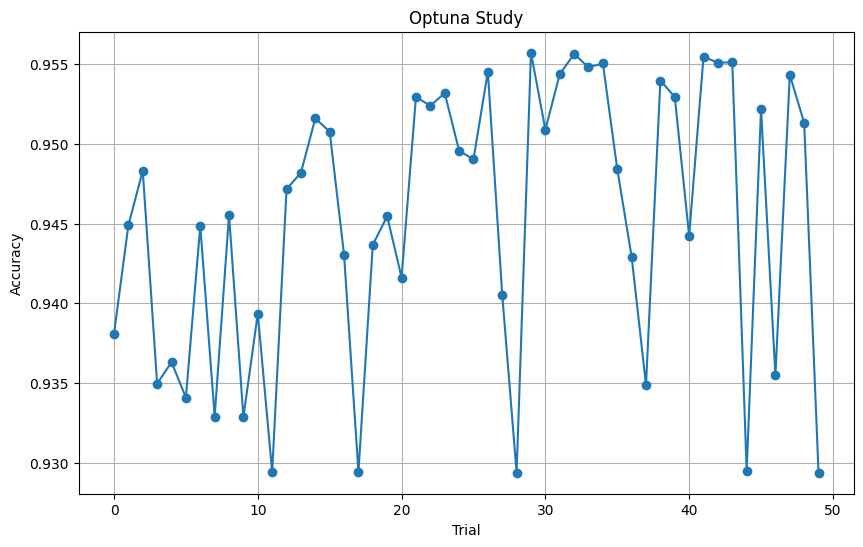

In [ ]:
# Output the best trial
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Visualize the output
import matplotlib.pyplot as plt

# Get all the trials and their scores
trials = study.trials
scores = [trial.value for trial in trials]

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(scores, marker='o', linestyle='-')
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.title('Optuna Study')
plt.grid(True)
plt.show()


### Conclusion and final results


In [ ]:
from sklearn.metrics import f1_score

# Predict the labels on the test set
y_pred = pipeline.predict(X_test)

# Calculate the F1 score using micro averaging
f1_micro = f1_score(y_test, y_pred, average='micro')

# Print the F1 score
print(f"F1 score (micro averaging): {f1_micro}")


F1 score (micro averaging): 0.9575075313144126


#### Done!